# Market Regime Classification

### Libraries

In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score,
                             recall_score, f1_score, classification_report)
from sklearn.decomposition import PCA
from sklearn.tree import plot_tree
import seaborn as sns

## Data Engineering

In [356]:
# Load your data (replace 'your_data.csv' with your actual file)
data = pd.read_csv('return based data.csv', sep = ";")
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.set_index('Date', inplace=True)
data = data.iloc[:, :-2]
data = data.iloc[:-1]
data['Regime'] = data['Regime'].astype(int)

display(data)

,Value Returns,Momentum Returns,Value-Momentum Spread,Value 12M Returns,Momentum 12M Returns,Value-Momentum 12M Spread,Value 36M Returns,Momentum 36M Returns,Value-Momentum 36M Spread,Rolling Value Mean,Rolling Momentum Mean,Rolling Mean Difference,Value Volatility,Momentum Volatility,Volatility Difference,Value Skewness,Momentum Skewness,Skewness Difference,Value Excess Curtosis,Momentum Excess Kurtosis,Kurtosis Difference,Correlation,Value Drawdown,Momentum Drawdown,Drawdown Difference,Regime
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
1926-07-30,0.016263,-0.016425,0.032688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0
1926-08-31,-0.000913,0.024592,-0.025505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000913,0.000000,-0.000913,1
1926-09-30,0.010665,0.011748,-0.001084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1
1926-10-29,0.013172,0.013163,0.000009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0
1926-11-30,0.015526,0.007463,0.008063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,-0.014953,0.008078,-0.023030,0.049019,0.077739,-0.028719,0.045068,0.040044,0.005025,0.004085,0.006309,-0.002223,0.014005,0.010535,0.003470,0.066135,0.281493,-0.215358,-0.756725,0.357312,-1.114037,0.252920,-0.014953,-0.003359,-0.011593,1
2022-11-30,0.013601,-0.034273,0.047873,0.064363,0.051688,0.012675,0.061571,0.001806,0.059765,0.005303,0.004315,0.000988,0.014156,0.015203,-0.001047,-0.208233,-1.362604,1.154371,-0.838335,3.539951,-4.378286,-0.013281,-0.001555,-0.037517,0.035962,0
2022-12-30,0.020601,0.000501,0.020100,0.081828,0.048721,0.033106,0.077126,0.013544,0.063582,0.006676,0.004079,0.002597,0.014815,0.015242,-0.000426,-0.396166,-1.298247,0.902081,-1.068207,3.345631,-4.413838,-0.035053,0.000000,-0.037035,0.037035,0


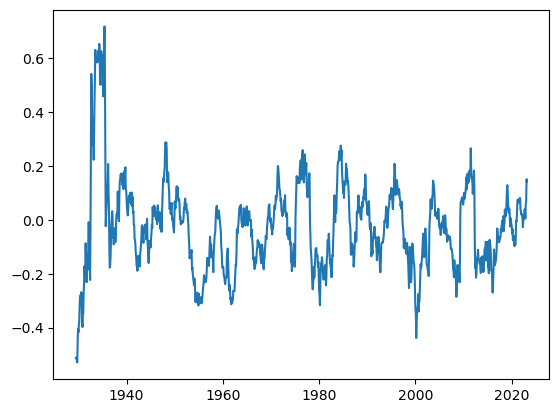

In [357]:
plt.plot(data["Value-Momentum 36M Spread"])

In [358]:
DFF = pd.read_csv('Federal Funds Effective Rate.csv', sep = ",")
DFF['DATE'] = pd.to_datetime(DFF['DATE'])  # convert 'DATE' to datetime
DFF = DFF.set_index('DATE')  # set 'DATE' column as index
DFF.index.name = 'Date'  # rename the index to 'Date'
DFF = DFF.rename(columns={'DFF': 'Effective Federal Funds Rate'})

combined_df = data.merge(DFF, left_index=True, right_index=True, how='outer')
combined_df.index = pd.to_datetime(combined_df.index).normalize()

display(combined_df)

,Value Returns,Momentum Returns,Value-Momentum Spread,Value 12M Returns,Momentum 12M Returns,Value-Momentum 12M Spread,Value 36M Returns,Momentum 36M Returns,Value-Momentum 36M Spread,Rolling Value Mean,Rolling Momentum Mean,Rolling Mean Difference,Value Volatility,Momentum Volatility,Volatility Difference,Value Skewness,Momentum Skewness,Skewness Difference,Value Excess Curtosis,Momentum Excess Kurtosis,Kurtosis Difference,Correlation,Value Drawdown,Momentum Drawdown,Drawdown Difference,Regime,Effective Federal Funds Rate
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
1926-07-30,0.016263,-0.016425,0.032688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,NaN
1926-08-31,-0.000913,0.024592,-0.025505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000913,0.0,-0.000913,1.0,NaN
1926-09-30,0.010665,0.011748,-0.001084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,1.0,NaN
1926-10-29,0.013172,0.013163,0.000009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,NaN
1926-11-30,0.015526,0.007463,0.008063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08
2023-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08
2023-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08


In [359]:
WALCL = pd.read_csv('Federal Reserve Assets.csv', sep = ",")
WALCL['DATE'] = pd.to_datetime(WALCL['DATE'])  # convert 'DATE' to datetime
WALCL = WALCL.set_index('DATE')  # set 'DATE' column as index
WALCL.index.name = 'Date'  # rename the index to 'Date'
WALCL = WALCL.rename(columns={'WALCL': 'Federal Reserve Assets'})

combined_df = combined_df.merge(WALCL, left_index=True, right_index=True, how='outer')
display(combined_df)

,Value Returns,Momentum Returns,Value-Momentum Spread,Value 12M Returns,Momentum 12M Returns,Value-Momentum 12M Spread,Value 36M Returns,Momentum 36M Returns,Value-Momentum 36M Spread,Rolling Value Mean,Rolling Momentum Mean,Rolling Mean Difference,Value Volatility,Momentum Volatility,Volatility Difference,Value Skewness,Momentum Skewness,Skewness Difference,Value Excess Curtosis,Momentum Excess Kurtosis,Kurtosis Difference,Correlation,Value Drawdown,Momentum Drawdown,Drawdown Difference,Regime,Effective Federal Funds Rate,Federal Reserve Assets
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1926-07-30,0.016263,-0.016425,0.032688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,NaN,NaN
1926-08-31,-0.000913,0.024592,-0.025505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000913,0.0,-0.000913,1.0,NaN,NaN
1926-09-30,0.010665,0.011748,-0.001084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,1.0,NaN,NaN
1926-10-29,0.013172,0.013163,0.000009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,NaN,NaN
1926-11-30,0.015526,0.007463,0.008063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN
2023-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN
2023-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN


In [360]:
MR = pd.read_csv('Mortage Rates.csv', sep = ",")
MR['DATE'] = pd.to_datetime(MR['DATE'])  # convert 'DATE' to datetime
MR = MR.set_index('DATE')  # set 'DATE' column as index
MR.index.name = 'Date'  # rename the index to 'Date'
MR = MR.rename(columns={'MORTGAGE30US': '30Y Mortage Rates'})
MR = MR.rename(columns={'MORTGAGE15US': '15Y Mortage Rates'})
MR = MR.rename(columns={'MORTGAGE5US': '5/1Y Mortage Rates'})

combined_df = combined_df.merge(MR, left_index=True, right_index=True, how='outer')
display(combined_df)

,Value Returns,Momentum Returns,Value-Momentum Spread,Value 12M Returns,Momentum 12M Returns,Value-Momentum 12M Spread,Value 36M Returns,Momentum 36M Returns,Value-Momentum 36M Spread,Rolling Value Mean,Rolling Momentum Mean,Rolling Mean Difference,Value Volatility,Momentum Volatility,Volatility Difference,Value Skewness,Momentum Skewness,Skewness Difference,Value Excess Curtosis,Momentum Excess Kurtosis,Kurtosis Difference,Correlation,Value Drawdown,Momentum Drawdown,Drawdown Difference,Regime,Effective Federal Funds Rate,Federal Reserve Assets,30Y Mortage Rates,15Y Mortage Rates,5/1Y Mortage Rates
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1926-07-30,0.016263,-0.016425,0.032688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN
1926-08-31,-0.000913,0.024592,-0.025505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000913,0.0,-0.000913,1.0,NaN,NaN,NaN,NaN,NaN
1926-09-30,0.010665,0.011748,-0.001084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,1.0,NaN,NaN,NaN,NaN,NaN
1926-10-29,0.013172,0.013163,0.000009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN
1926-11-30,0.015526,0.007463,0.008063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN,NaN,NaN,NaN
2023-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN,NaN,NaN,NaN
2023-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN,NaN,NaN,NaN


In [361]:
TY = pd.read_csv('Treasury Yields.csv', sep = ",")
TY['DATE'] = pd.to_datetime(TY['DATE'])  # convert 'DATE' to datetime
TY = TY.set_index('DATE')  # set 'DATE' column as index
TY.index.name = 'Date'  # rename the index to 'Date'
TY = TY.rename(columns={'DGS3MO': '3M Treasury Yields'})
TY = TY.rename(columns={'DGS2': '2Y Treasury Yields'})
TY = TY.rename(columns={'DGS5': '5Y Treasury Yields'})
TY = TY.rename(columns={'DGS10': '10Y Treasury Yields'})

combined_df = combined_df.merge(TY, left_index=True, right_index=True, how='outer')
display(combined_df)

,Value Returns,Momentum Returns,Value-Momentum Spread,Value 12M Returns,Momentum 12M Returns,Value-Momentum 12M Spread,Value 36M Returns,Momentum 36M Returns,Value-Momentum 36M Spread,Rolling Value Mean,Rolling Momentum Mean,Rolling Mean Difference,Value Volatility,Momentum Volatility,Volatility Difference,Value Skewness,Momentum Skewness,Skewness Difference,Value Excess Curtosis,Momentum Excess Kurtosis,Kurtosis Difference,Correlation,Value Drawdown,Momentum Drawdown,Drawdown Difference,Regime,Effective Federal Funds Rate,Federal Reserve Assets,30Y Mortage Rates,15Y Mortage Rates,5/1Y Mortage Rates,3M Treasury Yields,2Y Treasury Yields,5Y Treasury Yields,10Y Treasury Yields
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1926-07-30,0.016263,-0.016425,0.032688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-08-31,-0.000913,0.024592,-0.025505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000913,0.0,-0.000913,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-09-30,0.010665,0.011748,-0.001084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-10-29,0.013172,0.013163,0.000009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-11-30,0.015526,0.007463,0.008063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN,NaN,NaN,NaN,.,.,.,.
2023-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN,NaN,NaN,NaN,5.55,4.46,3.81,3.69


In [362]:
YS = pd.read_csv('Yield Spreads.csv', sep = ",")
YS['DATE'] = pd.to_datetime(YS['DATE'])  # convert 'DATE' to datetime
YS = YS.set_index('DATE')  # set 'DATE' column as index
YS.index.name = 'Date'  # rename the index to 'Date'
YS = YS.rename(columns={'T10Y2Y': '10-2Y Yield Spreads'})
YS = YS.rename(columns={'T10Y3M': '10-3M Yield Spreads'})

combined_df = combined_df.merge(YS, left_index=True, right_index=True, how='outer')
display(combined_df)

,Value Returns,Momentum Returns,Value-Momentum Spread,Value 12M Returns,Momentum 12M Returns,Value-Momentum 12M Spread,Value 36M Returns,Momentum 36M Returns,Value-Momentum 36M Spread,Rolling Value Mean,Rolling Momentum Mean,Rolling Mean Difference,Value Volatility,Momentum Volatility,Volatility Difference,Value Skewness,Momentum Skewness,Skewness Difference,Value Excess Curtosis,Momentum Excess Kurtosis,Kurtosis Difference,Correlation,Value Drawdown,Momentum Drawdown,Drawdown Difference,Regime,Effective Federal Funds Rate,Federal Reserve Assets,30Y Mortage Rates,15Y Mortage Rates,5/1Y Mortage Rates,3M Treasury Yields,2Y Treasury Yields,5Y Treasury Yields,10Y Treasury Yields,10-2Y Yield Spreads,10-3M Yield Spreads
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1926-07-30,0.016263,-0.016425,0.032688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-08-31,-0.000913,0.024592,-0.025505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000913,0.0,-0.000913,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-09-30,0.010665,0.011748,-0.001084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-10-29,0.013172,0.013163,0.000009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-11-30,0.015526,0.007463,0.008063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN,NaN,NaN,NaN,.,.,.,.,.,.
2023-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN,NaN,NaN,NaN,5.55,4.46,3.81,3.69,-0.77,-1.86
2023-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,8385854.0,NaN,NaN,NaN,5.52,4.40,3.74,3.64,-0.76,-1.88


In [363]:
FS = pd.read_csv('Financial Stress.csv', sep = ",")
FS['DATE'] = pd.to_datetime(FS['DATE'])  # convert 'DATE' to datetime
FS = FS.set_index('DATE')  # set 'DATE' column as index
FS.index.name = 'Date'  # rename the index to 'Date'
FS = FS.rename(columns={'NFCI': 'Chicago Fed National Financial Stress'})
FS = FS.rename(columns={'STLFSI4': 'St. Louis Fed Financial Stress'})

combined_df = combined_df.merge(FS, left_index=True, right_index=True, how='outer')
display(combined_df)

,Value Returns,Momentum Returns,Value-Momentum Spread,Value 12M Returns,Momentum 12M Returns,Value-Momentum 12M Spread,Value 36M Returns,Momentum 36M Returns,Value-Momentum 36M Spread,Rolling Value Mean,Rolling Momentum Mean,Rolling Mean Difference,Value Volatility,Momentum Volatility,Volatility Difference,Value Skewness,Momentum Skewness,Skewness Difference,Value Excess Curtosis,Momentum Excess Kurtosis,Kurtosis Difference,Correlation,Value Drawdown,Momentum Drawdown,Drawdown Difference,Regime,Effective Federal Funds Rate,Federal Reserve Assets,30Y Mortage Rates,15Y Mortage Rates,5/1Y Mortage Rates,3M Treasury Yields,2Y Treasury Yields,5Y Treasury Yields,10Y Treasury Yields,10-2Y Yield Spreads,10-3M Yield Spreads,Chicago Fed National Financial Stress,St. Louis Fed Financial Stress
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1926-07-30,0.016263,-0.016425,0.032688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-08-31,-0.000913,0.024592,-0.025505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000913,0.0,-0.000913,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-09-30,0.010665,0.011748,-0.001084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-10-29,0.013172,0.013163,0.000009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-11-30,0.015526,0.007463,0.008063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN,NaN,NaN,NaN,.,.,.,.,.,.,NaN,NaN
2023-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN,NaN,NaN,NaN,5.55,4.46,3.81,3.69,-0.77,-1.86,NaN,NaN
2023-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,8385854.0,NaN,NaN,NaN,5.52,4.40,3.74,3.64,-0.76,-1.88,NaN,NaN


In [364]:
import pandas as pd
from datetime import datetime

def date_parser(date):
    return datetime.strptime(date, "%Y%m")

SENT = pd.read_csv("Sentiment.csv", sep=';', parse_dates=['yearmo'], date_parser=date_parser)
SENT['yearmo'] = pd.to_datetime(SENT['yearmo'])  # convert 'DATE' to datetime
SENT = SENT.set_index('yearmo')  # set 'DATE' column as index
SENT.index.name = 'Date'  # rename the index to 'Date'
SENT = SENT.rename(columns={'SENT': 'Sentiment'})
SENT = SENT.iloc[:, 0:1]

combined_df = combined_df.merge(SENT, left_index=True, right_index=True, how='outer')
display(combined_df)

,Value Returns,Momentum Returns,Value-Momentum Spread,Value 12M Returns,Momentum 12M Returns,Value-Momentum 12M Spread,Value 36M Returns,Momentum 36M Returns,Value-Momentum 36M Spread,Rolling Value Mean,Rolling Momentum Mean,Rolling Mean Difference,Value Volatility,Momentum Volatility,Volatility Difference,Value Skewness,Momentum Skewness,Skewness Difference,Value Excess Curtosis,Momentum Excess Kurtosis,Kurtosis Difference,Correlation,Value Drawdown,Momentum Drawdown,Drawdown Difference,Regime,Effective Federal Funds Rate,Federal Reserve Assets,30Y Mortage Rates,15Y Mortage Rates,5/1Y Mortage Rates,3M Treasury Yields,2Y Treasury Yields,5Y Treasury Yields,10Y Treasury Yields,10-2Y Yield Spreads,10-3M Yield Spreads,Chicago Fed National Financial Stress,St. Louis Fed Financial Stress,Sentiment
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1926-07-30,0.016263,-0.016425,0.032688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-08-31,-0.000913,0.024592,-0.025505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000913,0.0,-0.000913,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-09-30,0.010665,0.011748,-0.001084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-10-29,0.013172,0.013163,0.000009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-11-30,0.015526,0.007463,0.008063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN,NaN,NaN,NaN,.,.,.,.,.,.,NaN,NaN,NaN
2023-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN,NaN,NaN,NaN,5.55,4.46,3.81,3.69,-0.77,-1.86,NaN,NaN,NaN
2023-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,8385854.0,NaN,NaN,NaN,5.52,4.40,3.74,3.64,-0.76,-1.88,NaN,NaN,NaN


In [365]:
# define a function to parse the date
def date_parser(date):
    try:
        return datetime.strptime(date, "%Y.%m")
    except ValueError:
        return datetime.strptime(date, "%Y.%-m")

# use the function when reading the csv
CAPE = pd.read_csv("CAPE.csv", parse_dates=['Date'], date_parser=date_parser, sep=';')
CAPE['Date'] = pd.to_datetime(CAPE['Date'])  # convert 'DATE' to datetime
CAPE = CAPE.set_index('Date')  # set 'DATE' column as index
CAPE.index.name = 'Date'  # rename the index to 'Date'

combined_df = combined_df.merge(CAPE, left_index=True, right_index=True, how='outer')
display(combined_df)

,Value Returns,Momentum Returns,Value-Momentum Spread,Value 12M Returns,Momentum 12M Returns,Value-Momentum 12M Spread,Value 36M Returns,Momentum 36M Returns,Value-Momentum 36M Spread,Rolling Value Mean,Rolling Momentum Mean,Rolling Mean Difference,Value Volatility,Momentum Volatility,Volatility Difference,Value Skewness,Momentum Skewness,Skewness Difference,Value Excess Curtosis,Momentum Excess Kurtosis,Kurtosis Difference,Correlation,Value Drawdown,Momentum Drawdown,Drawdown Difference,Regime,Effective Federal Funds Rate,Federal Reserve Assets,30Y Mortage Rates,15Y Mortage Rates,5/1Y Mortage Rates,3M Treasury Yields,2Y Treasury Yields,5Y Treasury Yields,10Y Treasury Yields,10-2Y Yield Spreads,10-3M Yield Spreads,Chicago Fed National Financial Stress,St. Louis Fed Financial Stress,Sentiment,CAPE
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1881-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.47
1881-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.26
1881-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.15
1881-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.27
1881-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN,NaN,NaN,NaN,.,.,.,.,.,.,NaN,NaN,NaN,NaN
2023-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN,NaN,NaN,NaN,5.55,4.46,3.81,3.69,-0.77,-1.86,NaN,NaN,NaN,NaN
2023-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,8385854.0,NaN,NaN,NaN,5.52,4.40,3.74,3.64,-0.76,-1.88,NaN,NaN,NaN,NaN


In [366]:
# define a function to parse the date
def date_parser(date):
    try:
        return datetime.strptime(date, "%Y.%m")
    except ValueError:
        return datetime.strptime(date, "%Y.%-m")

# use the function when reading the csv
BETA = pd.read_csv("Beta.csv", parse_dates=['Date'], date_parser=date_parser, sep=';')
BETA['Date'] = pd.to_datetime(BETA['Date'])  # convert 'DATE' to datetime
BETA = BETA.set_index('Date')  # set 'DATE' column as index
BETA.index.name = 'Date'  # rename the index to 'Date'
BETA = BETA.iloc[:, 1:2]
BETA = BETA.rename(columns={'Return': 'Beta'})

combined_df = combined_df.merge(BETA, left_index=True, right_index=True, how='outer')
display(combined_df)

,Value Returns,Momentum Returns,Value-Momentum Spread,Value 12M Returns,Momentum 12M Returns,Value-Momentum 12M Spread,Value 36M Returns,Momentum 36M Returns,Value-Momentum 36M Spread,Rolling Value Mean,Rolling Momentum Mean,Rolling Mean Difference,Value Volatility,Momentum Volatility,Volatility Difference,Value Skewness,Momentum Skewness,Skewness Difference,Value Excess Curtosis,Momentum Excess Kurtosis,Kurtosis Difference,Correlation,Value Drawdown,Momentum Drawdown,Drawdown Difference,Regime,Effective Federal Funds Rate,Federal Reserve Assets,30Y Mortage Rates,15Y Mortage Rates,5/1Y Mortage Rates,3M Treasury Yields,2Y Treasury Yields,5Y Treasury Yields,10Y Treasury Yields,10-2Y Yield Spreads,10-3M Yield Spreads,Chicago Fed National Financial Stress,St. Louis Fed Financial Stress,Sentiment,CAPE,Beta
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1871-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.061837
1871-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011802
1871-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014294
1871-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN,NaN,NaN,NaN,.,.,.,.,.,.,NaN,NaN,NaN,NaN,NaN
2023-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN,NaN,NaN,NaN,5.55,4.46,3.81,3.69,-0.77,-1.86,NaN,NaN,NaN,NaN,NaN
2023-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,8385854.0,NaN,NaN,NaN,5.52,4.40,3.74,3.64,-0.76,-1.88,NaN,NaN,NaN,NaN,NaN


In [367]:
# define a function to parse the date
def date_parser(date):
    return pd.to_datetime(date, format="%d.%m.%Y")

# use the function when reading the csv
GEO = pd.read_csv("Geopolitical Risk.csv", sep=';', parse_dates=['month'], date_parser=date_parser)
GEO['month'] = pd.to_datetime(GEO['month'])  # convert 'DATE' to datetime
GEO = GEO.set_index('month')  # set 'month' column as index
GEO.index.name = 'Date'  # rename the index to 'Date'
GEO = GEO.iloc[:, 3:4]
GEO = GEO.rename(columns={'GPRH': 'Geopolitical Risk'})

combined_df = combined_df.merge(GEO, left_index=True, right_index=True, how='outer')
display(combined_df)

,Value Returns,Momentum Returns,Value-Momentum Spread,Value 12M Returns,Momentum 12M Returns,Value-Momentum 12M Spread,Value 36M Returns,Momentum 36M Returns,Value-Momentum 36M Spread,Rolling Value Mean,Rolling Momentum Mean,Rolling Mean Difference,Value Volatility,Momentum Volatility,Volatility Difference,Value Skewness,Momentum Skewness,Skewness Difference,Value Excess Curtosis,Momentum Excess Kurtosis,Kurtosis Difference,Correlation,Value Drawdown,Momentum Drawdown,Drawdown Difference,Regime,Effective Federal Funds Rate,Federal Reserve Assets,30Y Mortage Rates,15Y Mortage Rates,5/1Y Mortage Rates,3M Treasury Yields,2Y Treasury Yields,5Y Treasury Yields,10Y Treasury Yields,10-2Y Yield Spreads,10-3M Yield Spreads,Chicago Fed National Financial Stress,St. Louis Fed Financial Stress,Sentiment,CAPE,Beta,Geopolitical Risk
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1871-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.061837,NaN
1871-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011802,NaN
1871-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014294,NaN
1871-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072038,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN,NaN,NaN,NaN,.,.,.,.,.,.,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN,NaN,NaN,NaN,5.55,4.46,3.81,3.69,-0.77,-1.86,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,8385854.0,NaN,NaN,NaN,5.52,4.40,3.74,3.64,-0.76,-1.88,NaN,NaN,NaN,NaN,NaN,NaN


In [368]:
combined_df = combined_df.replace('.', np.nan)
display(combined_df)

,Value Returns,Momentum Returns,Value-Momentum Spread,Value 12M Returns,Momentum 12M Returns,Value-Momentum 12M Spread,Value 36M Returns,Momentum 36M Returns,Value-Momentum 36M Spread,Rolling Value Mean,Rolling Momentum Mean,Rolling Mean Difference,Value Volatility,Momentum Volatility,Volatility Difference,Value Skewness,Momentum Skewness,Skewness Difference,Value Excess Curtosis,Momentum Excess Kurtosis,Kurtosis Difference,Correlation,Value Drawdown,Momentum Drawdown,Drawdown Difference,Regime,Effective Federal Funds Rate,Federal Reserve Assets,30Y Mortage Rates,15Y Mortage Rates,5/1Y Mortage Rates,3M Treasury Yields,2Y Treasury Yields,5Y Treasury Yields,10Y Treasury Yields,10-2Y Yield Spreads,10-3M Yield Spreads,Chicago Fed National Financial Stress,St. Louis Fed Financial Stress,Sentiment,CAPE,Beta,Geopolitical Risk
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1871-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.061837,NaN
1871-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011802,NaN
1871-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014294,NaN
1871-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072038,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,NaN,NaN,NaN,NaN,5.55,4.46,3.81,3.69,-0.77,-1.86,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.08,8385854.0,NaN,NaN,NaN,5.52,4.40,3.74,3.64,-0.76,-1.88,NaN,NaN,NaN,NaN,NaN,NaN


In [369]:
for col in combined_df.columns:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

filled_df = combined_df.fillna(method='ffill')
display(filled_df)

,Value Returns,Momentum Returns,Value-Momentum Spread,Value 12M Returns,Momentum 12M Returns,Value-Momentum 12M Spread,Value 36M Returns,Momentum 36M Returns,Value-Momentum 36M Spread,Rolling Value Mean,Rolling Momentum Mean,Rolling Mean Difference,Value Volatility,Momentum Volatility,Volatility Difference,Value Skewness,Momentum Skewness,Skewness Difference,Value Excess Curtosis,Momentum Excess Kurtosis,Kurtosis Difference,Correlation,Value Drawdown,Momentum Drawdown,Drawdown Difference,Regime,Effective Federal Funds Rate,Federal Reserve Assets,30Y Mortage Rates,15Y Mortage Rates,5/1Y Mortage Rates,3M Treasury Yields,2Y Treasury Yields,5Y Treasury Yields,10Y Treasury Yields,10-2Y Yield Spreads,10-3M Yield Spreads,Chicago Fed National Financial Stress,St. Louis Fed Financial Stress,Sentiment,CAPE,Beta,Geopolitical Risk
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1871-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.061837,NaN
1871-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011802,NaN
1871-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014294,NaN
1871-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072038,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-29,0.005832,0.007661,-0.001829,0.073665,0.018746,0.054919,0.106432,-0.03477,0.141202,0.006022,0.001697,0.004325,0.013288,0.017898,-0.00461,-0.728337,-0.995776,0.26744,-0.577665,0.696103,-1.273767,-0.159114,0.0,-0.057639,0.057639,1.0,5.08,8436255.0,6.57,5.97,6.06,5.34,4.54,3.92,3.80,-0.74,-1.54,-0.29,-0.6017,1.187,28.91,0.031844,84.33
2023-05-30,0.005832,0.007661,-0.001829,0.073665,0.018746,0.054919,0.106432,-0.03477,0.141202,0.006022,0.001697,0.004325,0.013288,0.017898,-0.00461,-0.728337,-0.995776,0.26744,-0.577665,0.696103,-1.273767,-0.159114,0.0,-0.057639,0.057639,1.0,5.08,8436255.0,6.57,5.97,6.06,5.55,4.46,3.81,3.69,-0.77,-1.86,-0.29,-0.6017,1.187,28.91,0.031844,84.33
2023-05-31,0.005832,0.007661,-0.001829,0.073665,0.018746,0.054919,0.106432,-0.03477,0.141202,0.006022,0.001697,0.004325,0.013288,0.017898,-0.00461,-0.728337,-0.995776,0.26744,-0.577665,0.696103,-1.273767,-0.159114,0.0,-0.057639,0.057639,1.0,5.08,8385854.0,6.57,5.97,6.06,5.52,4.40,3.74,3.64,-0.76,-1.88,-0.29,-0.6017,1.187,28.91,0.031844,84.33


In [370]:
pd.set_option('display.max_columns', None)

# convert your date strings to datetime objects
start_date = pd.to_datetime("1926-07-01")
end_date = pd.to_datetime("2023-02-28")

# filter the dataframe
filtered_df = filled_df[(filled_df.index >= start_date) & (filled_df.index <= end_date)]

display(filtered_df)

,Value Returns,Momentum Returns,Value-Momentum Spread,Value 12M Returns,Momentum 12M Returns,Value-Momentum 12M Spread,Value 36M Returns,Momentum 36M Returns,Value-Momentum 36M Spread,Rolling Value Mean,Rolling Momentum Mean,Rolling Mean Difference,Value Volatility,Momentum Volatility,Volatility Difference,Value Skewness,Momentum Skewness,Skewness Difference,Value Excess Curtosis,Momentum Excess Kurtosis,Kurtosis Difference,Correlation,Value Drawdown,Momentum Drawdown,Drawdown Difference,Regime,Effective Federal Funds Rate,Federal Reserve Assets,30Y Mortage Rates,15Y Mortage Rates,5/1Y Mortage Rates,3M Treasury Yields,2Y Treasury Yields,5Y Treasury Yields,10Y Treasury Yields,10-2Y Yield Spreads,10-3M Yield Spreads,Chicago Fed National Financial Stress,St. Louis Fed Financial Stress,Sentiment,CAPE,Beta,Geopolitical Risk
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1926-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.87,0.058565,36.16
1926-07-30,0.016263,-0.016425,0.032688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.87,0.058565,36.16
1926-08-01,0.016263,-0.016425,0.032688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.49,0.049979,39.15
1926-08-31,-0.000913,0.024592,-0.025505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000913,0.000000,-0.000913,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.49,0.049979,39.15
1926-09-01,-0.000913,0.024592,-0.025505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000913,0.000000,-0.000913,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.69,0.013657,45.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24,0.011346,-0.028836,0.040181,0.065310,0.009240,0.056070,0.108058,-0.042489,0.150547,0.005369,0.000913,0.004456,0.013489,0.017819,-0.00433,-0.544979,-0.855573,0.310594,-0.935745,0.541486,-1.477231,-0.148908,0.000000,-0.064803,0.064803,0.0,4.58,8382190.0,6.5,5.76,6.06,4.86,4.78,4.19,3.95,-0.83,-0.91,-0.27,-0.2527,1.187,28.98,0.025753,102.67
2023-02-25,0.011346,-0.028836,0.040181,0.065310,0.009240,0.056070,0.108058,-0.042489,0.150547,0.005369,0.000913,0.004456,0.013489,0.017819,-0.00433,-0.544979,-0.855573,0.310594,-0.935745,0.541486,-1.477231,-0.148908,0.000000,-0.064803,0.064803,0.0,4.58,8382190.0,6.5,5.76,6.06,4.86,4.78,4.19,3.95,-0.83,-0.91,-0.27,-0.2527,1.187,28.98,0.025753,102.67
2023-02-26,0.011346,-0.028836,0.040181,0.065310,0.009240,0.056070,0.108058,-0.042489,0.150547,0.005369,0.000913,0.004456,0.013489,0.017819,-0.00433,-0.544979,-0.855573,0.310594,-0.935745,0.541486,-1.477231,-0.148908,0.000000,-0.064803,0.064803,0.0,4.58,8382190.0,6.5,5.76,6.06,4.86,4.78,4.19,3.95,-0.83,-0.91,-0.27,-0.2527,1.187,28.98,0.025753,102.67


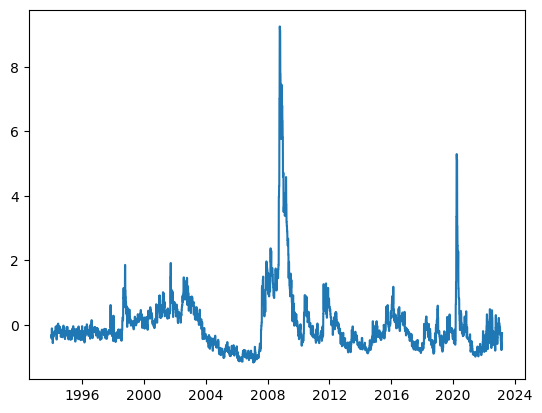

In [371]:
plt.plot(filtered_df["St. Louis Fed Financial Stress"])

In [372]:
# 'B' stands for business day frequency
df_monthly = filtered_df.resample('M').last()

display(df_monthly)

,Value Returns,Momentum Returns,Value-Momentum Spread,Value 12M Returns,Momentum 12M Returns,Value-Momentum 12M Spread,Value 36M Returns,Momentum 36M Returns,Value-Momentum 36M Spread,Rolling Value Mean,Rolling Momentum Mean,Rolling Mean Difference,Value Volatility,Momentum Volatility,Volatility Difference,Value Skewness,Momentum Skewness,Skewness Difference,Value Excess Curtosis,Momentum Excess Kurtosis,Kurtosis Difference,Correlation,Value Drawdown,Momentum Drawdown,Drawdown Difference,Regime,Effective Federal Funds Rate,Federal Reserve Assets,30Y Mortage Rates,15Y Mortage Rates,5/1Y Mortage Rates,3M Treasury Yields,2Y Treasury Yields,5Y Treasury Yields,10Y Treasury Yields,10-2Y Yield Spreads,10-3M Yield Spreads,Chicago Fed National Financial Stress,St. Louis Fed Financial Stress,Sentiment,CAPE,Beta,Geopolitical Risk
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.016263,-0.016425,0.032688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.87,0.058565,36.16
1926-08-31,-0.000913,0.024592,-0.025505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000913,0.000000,-0.000913,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.49,0.049979,39.15
1926-09-30,0.010665,0.011748,-0.001084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.69,0.013657,45.02
1926-10-31,0.013172,0.013163,0.000009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.69,0.013657,34.68
1926-11-30,0.015526,0.007463,0.008063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.62,0.011678,35.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,-0.014953,0.008078,-0.023030,0.049019,0.077739,-0.028719,0.045068,0.040044,0.005025,0.004085,0.006309,-0.002223,0.014005,0.010535,0.003470,0.066135,0.281493,-0.215358,-0.756725,0.357312,-1.114037,0.252920,-0.014953,-0.003359,-0.011593,1.0,3.08,8723090.0,7.08,6.36,5.96,4.22,4.51,4.27,4.10,-0.41,-0.12,-0.12,-0.3996,1.187,28.23,-0.074755,129.08
2022-11-30,0.013601,-0.034273,0.047873,0.064363,0.051688,0.012675,0.061571,0.001806,0.059765,0.005303,0.004315,0.000988,0.014156,0.015203,-0.001047,-0.208233,-1.362604,1.154371,-0.838335,3.539951,-4.378286,-0.013281,-0.001555,-0.037517,0.035962,0.0,3.83,8584576.0,6.58,5.90,6.06,4.37,4.38,3.82,3.68,-0.70,-0.69,-0.19,-0.2710,1.187,28.38,0.053927,100.42
2022-12-31,0.020601,0.000501,0.020100,0.081828,0.048721,0.033106,0.077126,0.013544,0.063582,0.006676,0.004079,0.002597,0.014815,0.015242,-0.000426,-0.396166,-1.298247,0.902081,-1.068207,3.345631,-4.413838,-0.035053,0.000000,-0.037035,0.037035,0.0,4.33,8551169.0,6.42,5.68,6.06,4.42,4.41,3.99,3.88,-0.53,-0.54,-0.22,-0.0541,1.187,28.32,0.003200,95.64


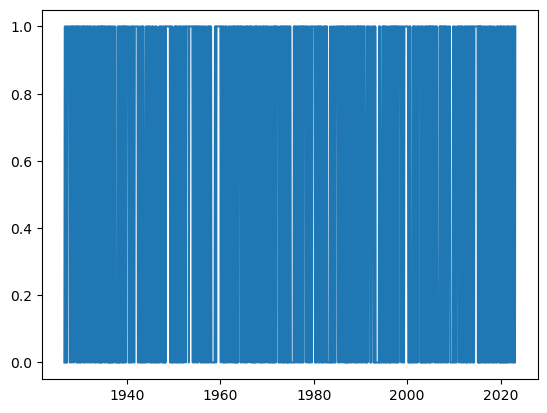

In [373]:
plt.plot(df_monthly.iloc[:, -18])

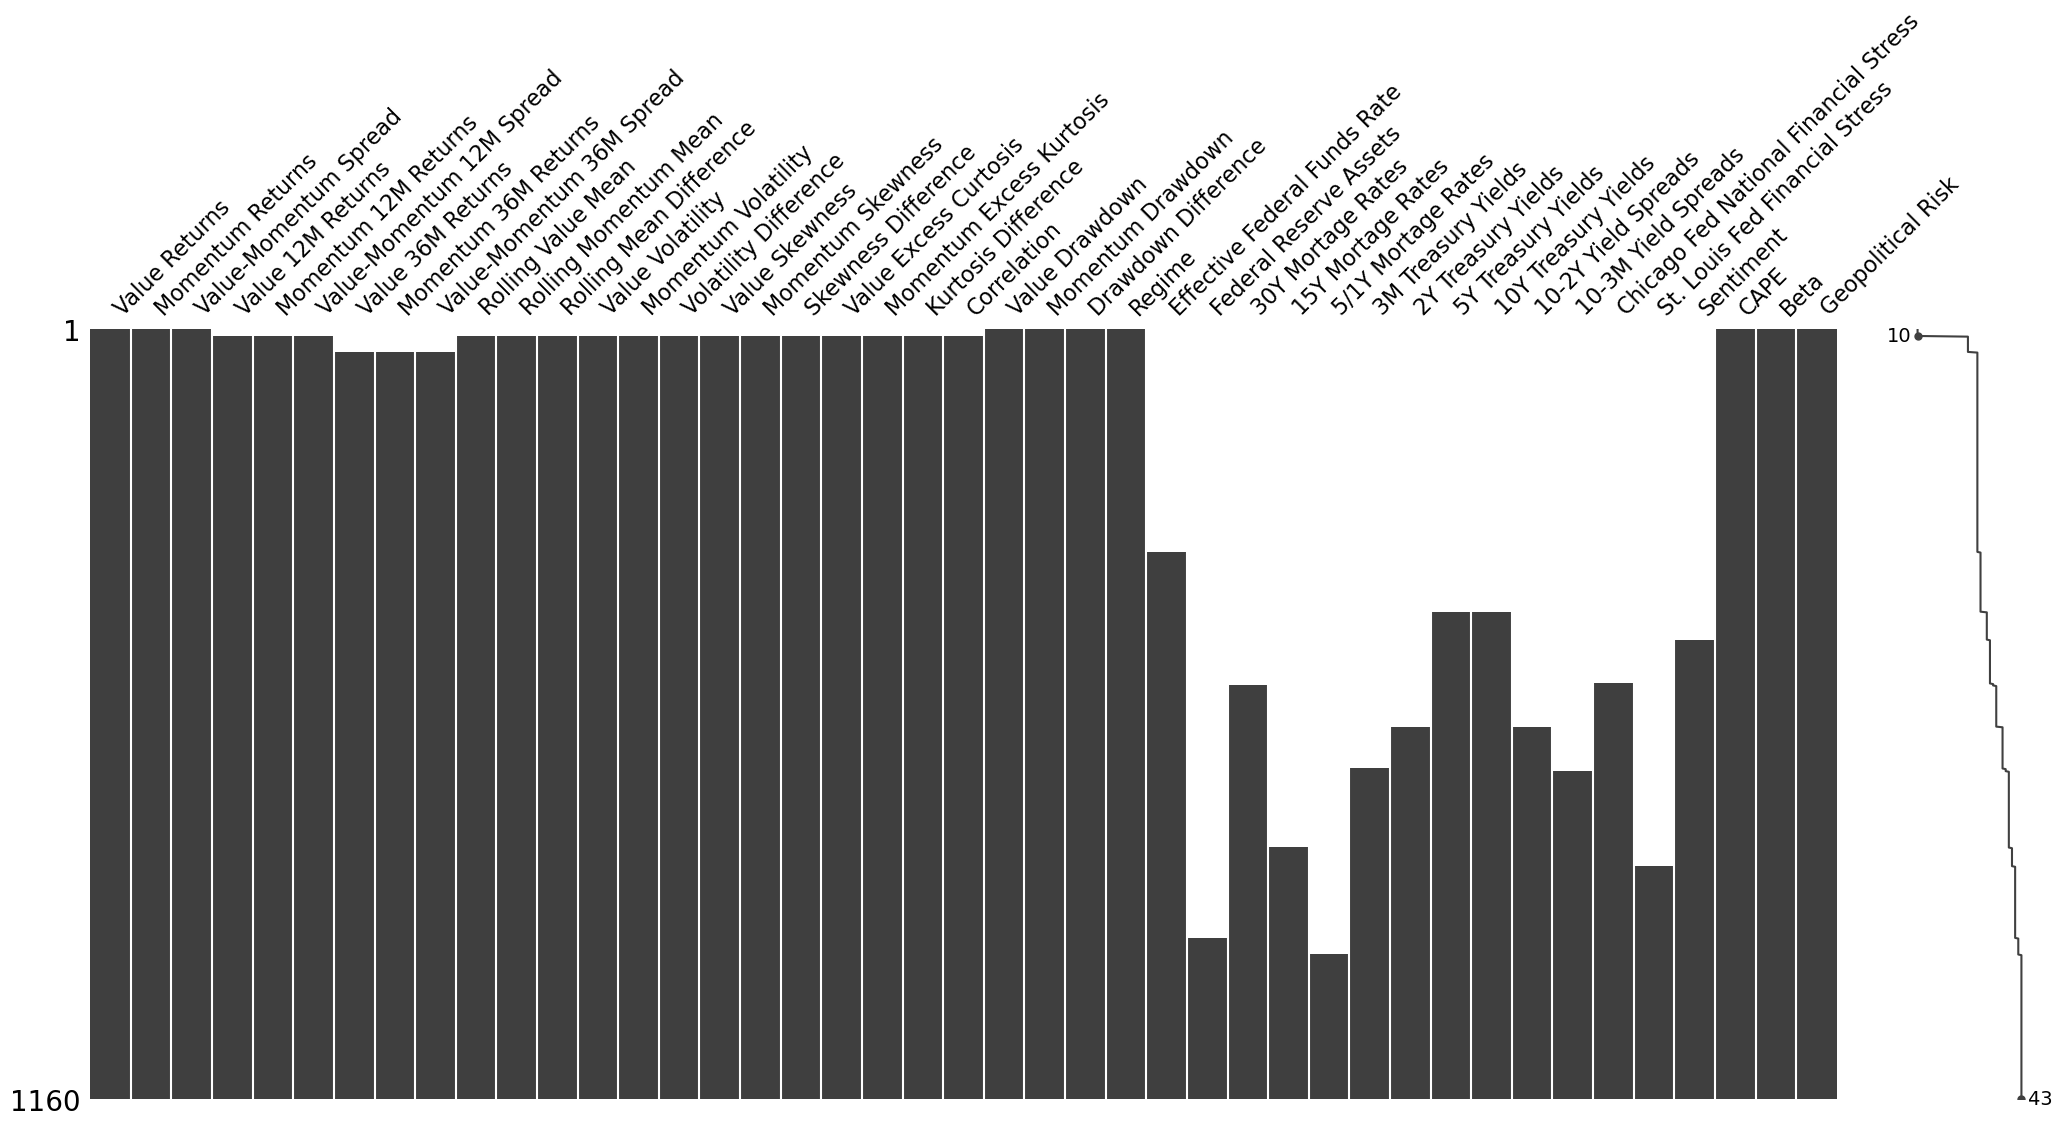

In [374]:
import missingno as msno
import matplotlib.pyplot as plt

# Assume df is your DataFrame
msno.matrix(df_monthly)
plt.show()

In [375]:
from fancyimpute import IterativeImputer

# Initialize the MICE imputer
mice_imputer = IterativeImputer()

# Fit and transform the data
df_monthly_imputed = mice_imputer.fit_transform(df_monthly)

# Convert the output back to a pandas dataframe
df_monthly_imputed = pd.DataFrame(df_monthly_imputed, columns=df_monthly.columns, index=df_monthly.index)

display(df_monthly_imputed)

,Value Returns,Momentum Returns,Value-Momentum Spread,Value 12M Returns,Momentum 12M Returns,Value-Momentum 12M Spread,Value 36M Returns,Momentum 36M Returns,Value-Momentum 36M Spread,Rolling Value Mean,Rolling Momentum Mean,Rolling Mean Difference,Value Volatility,Momentum Volatility,Volatility Difference,Value Skewness,Momentum Skewness,Skewness Difference,Value Excess Curtosis,Momentum Excess Kurtosis,Kurtosis Difference,Correlation,Value Drawdown,Momentum Drawdown,Drawdown Difference,Regime,Effective Federal Funds Rate,Federal Reserve Assets,30Y Mortage Rates,15Y Mortage Rates,5/1Y Mortage Rates,3M Treasury Yields,2Y Treasury Yields,5Y Treasury Yields,10Y Treasury Yields,10-2Y Yield Spreads,10-3M Yield Spreads,Chicago Fed National Financial Stress,St. Louis Fed Financial Stress,Sentiment,CAPE,Beta,Geopolitical Risk
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.016263,-0.016425,0.032688,0.026440,0.035895,-0.009455,0.084574,0.109891,-0.025317,0.002136,0.002954,-0.000819,0.011836,0.014544,-0.002708,0.181713,-0.740920,0.922632,0.401832,0.218237,0.013426,-0.368956,0.000000,0.000000,0.000000,0.0,4.966985,3.437833e+06,7.613529,2.686780,23.928439,-51.983350,-1656.806398,5.534538,5.892845,1662.699250,57.876243,0.184784,1025.083196,-0.771058,11.87,0.058565,36.16
1926-08-31,-0.000913,0.024592,-0.025505,0.026440,0.035895,-0.009455,0.084574,0.109891,-0.025317,0.002136,0.002954,-0.000819,0.011836,0.014544,-0.002708,0.181713,-0.930380,1.112093,0.401832,0.291736,0.013591,-0.377496,-0.000913,0.000000,-0.000913,1.0,5.064182,3.437833e+06,7.587773,4.573098,16.637130,-27.647042,-937.580641,5.538826,5.908852,943.489497,33.555921,0.173307,581.998587,-0.795109,12.49,0.049979,39.15
1926-09-30,0.010665,0.011748,-0.001084,0.026440,0.035895,-0.009455,0.084574,0.109891,-0.025317,0.002136,0.002954,-0.000819,0.011836,0.014544,-0.002708,0.181713,-0.858838,1.040551,0.401832,0.251411,0.021244,-0.367792,0.000000,0.000000,0.000000,1.0,5.096354,3.437833e+06,7.604749,3.724990,19.856751,-38.421679,-1256.555412,5.563265,5.906259,1262.461677,44.327974,0.230742,778.693911,-0.729423,12.69,0.013657,45.02
1926-10-31,0.013172,0.013163,0.000009,0.026440,0.035895,-0.009455,0.084574,0.109891,-0.025317,0.002136,0.002954,-0.000819,0.011836,0.014544,-0.002708,0.181713,-1.559372,1.741085,0.401832,0.200646,0.093521,-0.402578,0.000000,0.000000,0.000000,0.0,5.213557,3.437833e+06,7.653695,4.321216,17.793838,-31.320936,-1046.464781,5.535564,5.902786,1052.367572,37.223752,0.094410,649.086322,-0.757494,12.69,0.013657,34.68
1926-11-30,0.015526,0.007463,0.008063,0.026440,0.035895,-0.009455,0.084574,0.109891,-0.025317,0.002136,0.002954,-0.000819,0.011836,0.014544,-0.002708,0.181713,-1.363417,1.545130,0.401832,0.237742,-0.025993,-0.392128,0.000000,0.000000,0.000000,0.0,5.189048,3.437833e+06,7.646969,2.166963,25.902024,-58.547405,-1851.476417,5.542562,5.902196,1857.378621,64.449655,0.130181,1145.084216,-0.742436,12.62,0.011678,35.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,-0.014953,0.008078,-0.023030,0.049019,0.077739,-0.028719,0.045068,0.040044,0.005025,0.004085,0.006309,-0.002223,0.014005,0.010535,0.003470,0.066135,0.281493,-0.215358,-0.756725,0.357312,-1.114037,0.252920,-0.014953,-0.003359,-0.011593,1.0,3.080000,8.723090e+06,7.080000,6.360000,5.960000,4.220000,4.510000,4.270000,4.100000,-0.410000,-0.120000,-0.120000,-0.399600,1.187000,28.23,-0.074755,129.08
2022-11-30,0.013601,-0.034273,0.047873,0.064363,0.051688,0.012675,0.061571,0.001806,0.059765,0.005303,0.004315,0.000988,0.014156,0.015203,-0.001047,-0.208233,-1.362604,1.154371,-0.838335,3.539951,-4.378286,-0.013281,-0.001555,-0.037517,0.035962,0.0,3.830000,8.584576e+06,6.580000,5.900000,6.060000,4.370000,4.380000,3.820000,3.680000,-0.700000,-0.690000,-0.190000,-0.271000,1.187000,28.38,0.053927,100.42
2022-12-31,0.020601,0.000501,0.020100,0.081828,0.048721,0.033106,0.0771

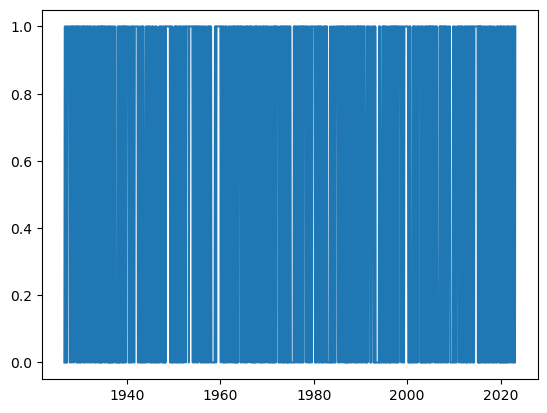

In [376]:
plt.plot(df_monthly_imputed.iloc[:, -18])

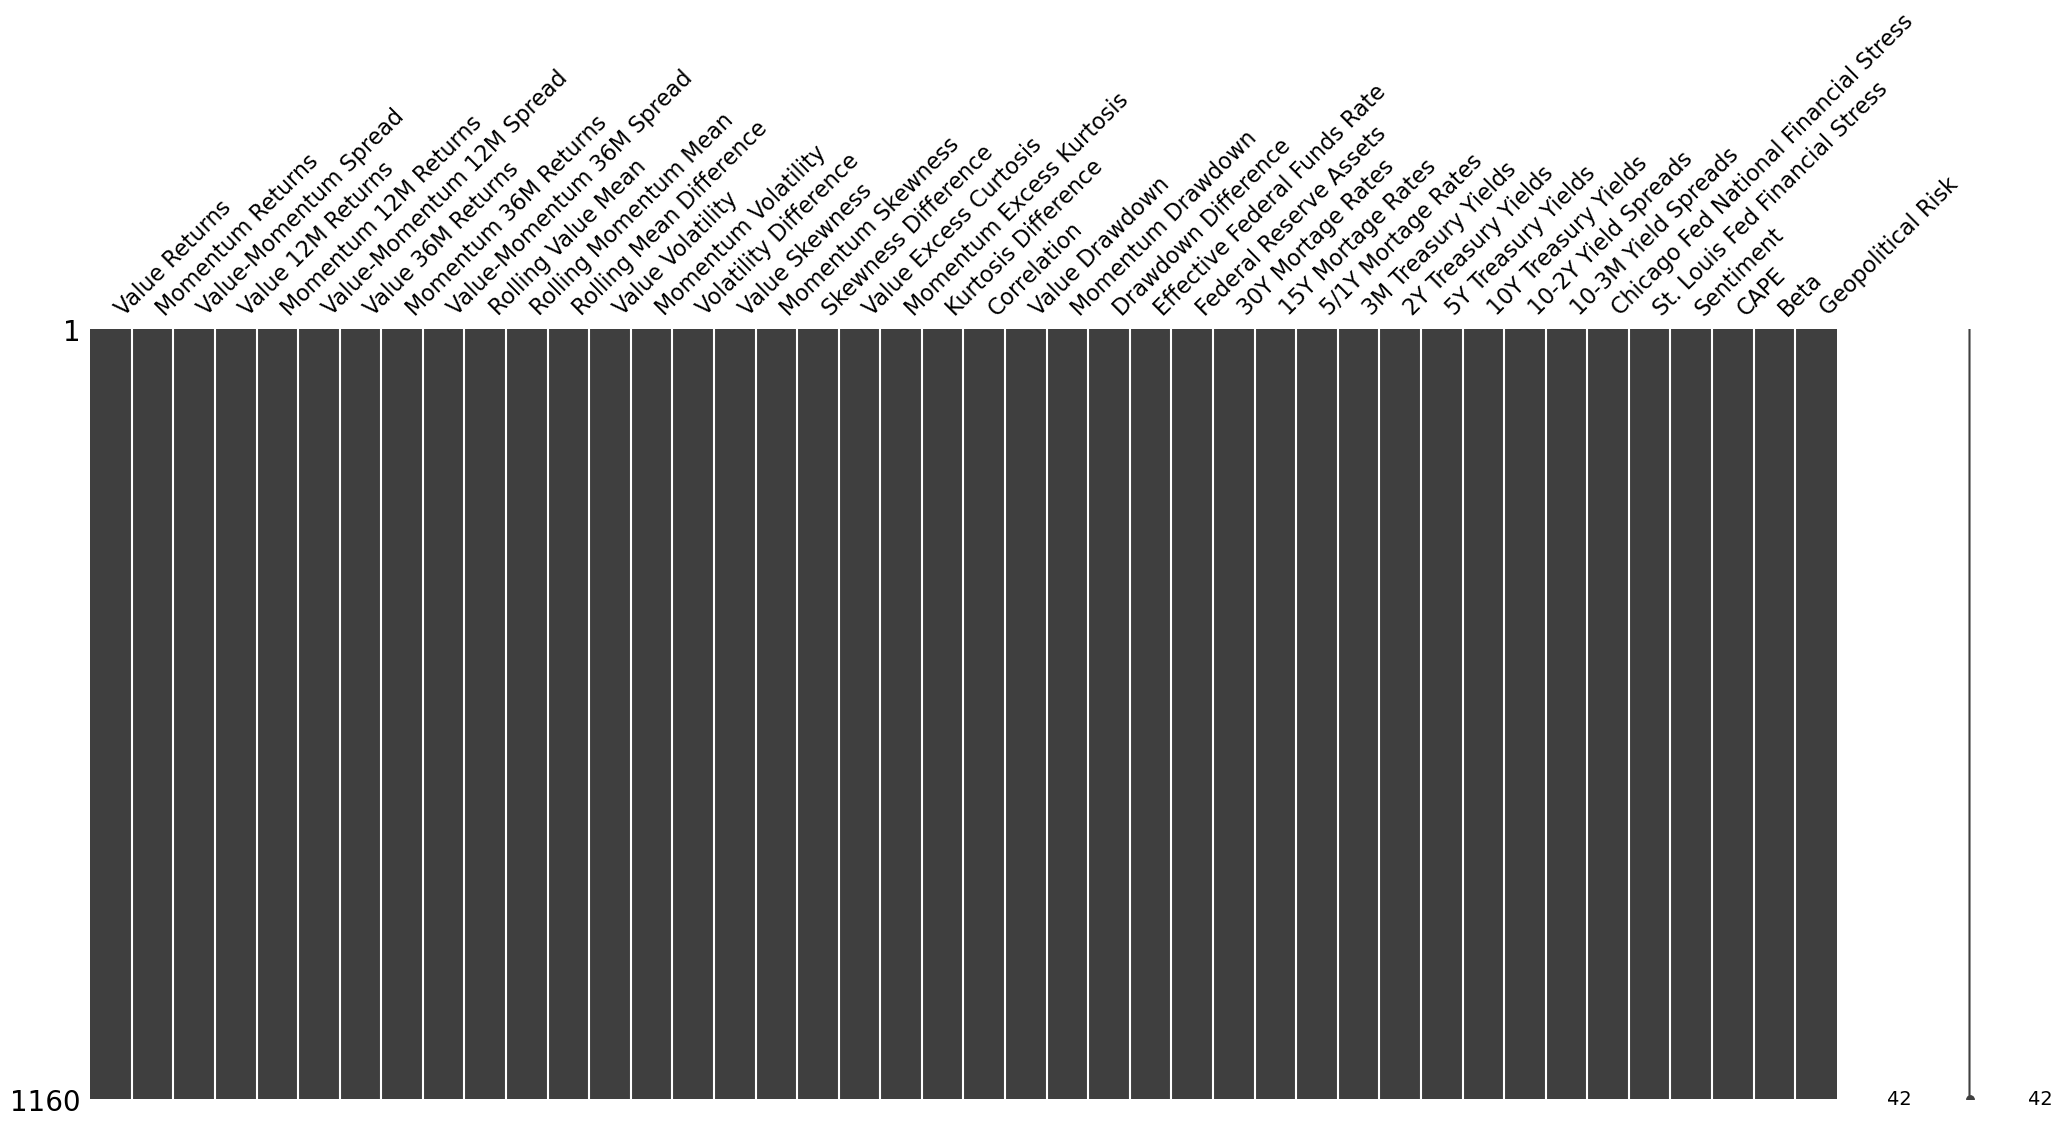

In [377]:
df_monthly_imputed = df_monthly_imputed.drop(columns="Regime")
msno.matrix(df_monthly_imputed)
plt.show()

In [378]:
from sklearn.model_selection import train_test_split

# First, split the data into a (70%) training set and a (30%) set to split further into validation and test data
df_train, df_temp = train_test_split(df_monthly_imputed, test_size=0.3, random_state=42, shuffle=False)

# Split the temporary set into validation (15%) and test sets (15%)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42, shuffle=True)

In [379]:
display(df_train)

,Value Returns,Momentum Returns,Value-Momentum Spread,Value 12M Returns,Momentum 12M Returns,Value-Momentum 12M Spread,Value 36M Returns,Momentum 36M Returns,Value-Momentum 36M Spread,Rolling Value Mean,Rolling Momentum Mean,Rolling Mean Difference,Value Volatility,Momentum Volatility,Volatility Difference,Value Skewness,Momentum Skewness,Skewness Difference,Value Excess Curtosis,Momentum Excess Kurtosis,Kurtosis Difference,Correlation,Value Drawdown,Momentum Drawdown,Drawdown Difference,Effective Federal Funds Rate,Federal Reserve Assets,30Y Mortage Rates,15Y Mortage Rates,5/1Y Mortage Rates,3M Treasury Yields,2Y Treasury Yields,5Y Treasury Yields,10Y Treasury Yields,10-2Y Yield Spreads,10-3M Yield Spreads,Chicago Fed National Financial Stress,St. Louis Fed Financial Stress,Sentiment,CAPE,Beta,Geopolitical Risk
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.016263,-0.016425,0.032688,0.026440,0.035895,-0.009455,0.084574,0.109891,-0.025317,0.002136,0.002954,-0.000819,0.011836,0.014544,-0.002708,0.181713,-0.740920,0.922632,0.401832,0.218237,0.013426,-0.368956,0.000000,0.000000,0.000000,4.966985,3.437833e+06,7.613529,2.686780,23.928439,-51.983350,-1656.806398,5.534538,5.892845,1662.699250,57.876243,0.184784,1025.083196,-0.771058,11.87,0.058565,36.16
1926-08-31,-0.000913,0.024592,-0.025505,0.026440,0.035895,-0.009455,0.084574,0.109891,-0.025317,0.002136,0.002954,-0.000819,0.011836,0.014544,-0.002708,0.181713,-0.930380,1.112093,0.401832,0.291736,0.013591,-0.377496,-0.000913,0.000000,-0.000913,5.064182,3.437833e+06,7.587773,4.573098,16.637130,-27.647042,-937.580641,5.538826,5.908852,943.489497,33.555921,0.173307,581.998587,-0.795109,12.49,0.049979,39.15
1926-09-30,0.010665,0.011748,-0.001084,0.026440,0.035895,-0.009455,0.084574,0.109891,-0.025317,0.002136,0.002954,-0.000819,0.011836,0.014544,-0.002708,0.181713,-0.858838,1.040551,0.401832,0.251411,0.021244,-0.367792,0.000000,0.000000,0.000000,5.096354,3.437833e+06,7.604749,3.724990,19.856751,-38.421679,-1256.555412,5.563265,5.906259,1262.461677,44.327974,0.230742,778.693911,-0.729423,12.69,0.013657,45.02
1926-10-31,0.013172,0.013163,0.000009,0.026440,0.035895,-0.009455,0.084574,0.109891,-0.025317,0.002136,0.002954,-0.000819,0.011836,0.014544,-0.002708,0.181713,-1.559372,1.741085,0.401832,0.200646,0.093521,-0.402578,0.000000,0.000000,0.000000,5.213557,3.437833e+06,7.653695,4.321216,17.793838,-31.320936,-1046.464781,5.535564,5.902786,1052.367572,37.223752,0.094410,649.086322,-0.757494,12.69,0.013657,34.68
1926-11-30,0.015526,0.007463,0.008063,0.026440,0.035895,-0.009455,0.084574,0.109891,-0.025317,0.002136,0.002954,-0.000819,0.011836,0.014544,-0.002708,0.181713,-1.363417,1.545130,0.401832,0.237742,-0.025993,-0.392128,0.000000,0.000000,0.000000,5.189048,3.437833e+06,7.646969,2.166963,25.902024,-58.547405,-1851.476417,5.542562,5.902196,1857.378621,64.449655,0.130181,1145.084216,-0.742436,12.62,0.011678,35.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993-10-31,0.020017,0.017836,0.002181,0.120194,0.010020,0.110174,0.151659,0.134637,0.017022,0.009534,0.000900,0.008634,0.008244,0.012260,-0.004015,-0.806274,-0.038801,-0.767472,-0.275954,-0.951484,0.675530,0.493525,0.000000,-0.006611,0.006611,3.030000,3.437833e+06,6.860000,6.400000,5.849340,3.100000,3.990000,4.830000,5.430000,1.440000,2.330000,-1.000000,-0.470422,0.416000,20.99,0.011454,92.53
1993-11-30,0.009688,-0.013041,0.022729,0.115167,0.017075,0.098091,0.161040,0.112406,0.048635,0.009155,0.001471,0.007684,0.008112,0.011328,-0.003216,-0.699270,0.240112,-0.939383,-0.253822,-1.327456,1.073635,0.640049,0.000000,-0.019566,0.019566,3.160000,3.437833e+06,7.310000,6.840000,6.218785,3.210000,4.220000,5.150000,5.830000,1.610000,2.620000,-0.960000,-0.414632,0.565000,21.04,-0.000607,71.49
1993-12-31,0.011690,0.024119,-0.012429,0.118920,0.031514,0.087406,0.184281,0.149604,0.034677,0.009438,0.002665,0.006773,0.

In [380]:
# assuming df is your DataFrame
df_train.to_excel('Raw Training Data.xlsx')

In [381]:
from sklearn.preprocessing import StandardScaler

# Create the scaler
standard_scaler = StandardScaler()

# Fit and transform with standard scaler (standardization)
df_monthly_standardized = standard_scaler.fit_transform(df_train)

# Convert back to DataFrame
df_monthly_standardized = pd.DataFrame(df_monthly_standardized, columns=df_train.columns, index=df_train.index)

In [382]:
# Assuming you have a DataFrame called 'df_monthly_standardized' with a column named 'Date' containing the dates

# Sort the DataFrame by the 'Date' column in ascending order
df_sorted = df_monthly_standardized.sort_values('Date')

# Reset the index if needed
#df_sorted = df_sorted.reset_index(drop=True)


In [383]:
display(df_sorted)

,Value Returns,Momentum Returns,Value-Momentum Spread,Value 12M Returns,Momentum 12M Returns,Value-Momentum 12M Spread,Value 36M Returns,Momentum 36M Returns,Value-Momentum 36M Spread,Rolling Value Mean,Rolling Momentum Mean,Rolling Mean Difference,Value Volatility,Momentum Volatility,Volatility Difference,Value Skewness,Momentum Skewness,Skewness Difference,Value Excess Curtosis,Momentum Excess Kurtosis,Kurtosis Difference,Correlation,Value Drawdown,Momentum Drawdown,Drawdown Difference,Effective Federal Funds Rate,Federal Reserve Assets,30Y Mortage Rates,15Y Mortage Rates,5/1Y Mortage Rates,3M Treasury Yields,2Y Treasury Yields,5Y Treasury Yields,10Y Treasury Yields,10-2Y Yield Spreads,10-3M Yield Spreads,Chicago Fed National Financial Stress,St. Louis Fed Financial Stress,Sentiment,CAPE,Beta,Geopolitical Risk
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.897398,-1.154280,1.196249,-0.072157,-0.043164,-0.021218,-0.126818,-0.058819,-0.047086,-0.072409,-0.044952,-0.020469,-0.132575,-0.036551,-0.155091,-0.052026,-0.601266,0.349526,-0.066878,-0.116883,-0.046444,-0.084186,0.776304,0.671494,-0.213851,-0.128849,1.837797,-0.488060,-2.426679,5.976508,-10.063175,-10.781020,-0.424244,-0.443418,10.782048,10.736715,-0.032324,10.780270,-0.396457,-0.659044,1.096751,-1.042904
1926-08-31,-0.228249,1.256628,-0.892286,-0.072157,-0.043164,-0.021219,-0.126818,-0.058820,-0.047086,-0.072414,-0.044965,-0.020465,-0.132575,-0.036551,-0.155091,-0.052026,-0.858970,0.514229,-0.066878,-0.069150,-0.046369,-0.106494,0.757312,0.671494,-0.222748,-0.098142,1.438081,-0.500331,-1.581308,3.244908,-5.733051,-6.078384,-0.422258,-0.435573,6.076486,6.044754,-0.045917,6.075373,-0.422735,-0.525913,0.920973,-0.999930
1926-09-30,0.530515,0.501700,-0.015799,-0.072157,-0.043164,-0.021218,-0.126818,-0.058819,-0.047086,-0.072402,-0.044937,-0.020473,-0.132575,-0.036551,-0.155091,-0.052026,-0.761658,0.452035,-0.066878,-0.095338,-0.042913,-0.081146,0.776304,0.671494,-0.213851,-0.087978,1.518730,-0.492243,-1.961396,4.451100,-7.650166,-8.163991,-0.410939,-0.436844,8.163420,8.122936,0.022108,8.163984,-0.350965,-0.482968,0.177423,-0.915562
1926-10-31,0.694797,0.584852,0.023397,-0.072157,-0.043164,-0.021218,-0.126818,-0.058820,-0.047086,-0.072409,-0.044945,-0.020477,-0.132575,-0.036552,-0.155091,-0.052026,-1.714524,1.061027,-0.066878,-0.128308,-0.010266,-0.172008,0.776304,0.671494,-0.213851,-0.050951,1.558281,-0.468924,-1.694192,3.678255,-6.386741,-6.790320,-0.423769,-0.438546,6.788841,6.752364,-0.139362,6.787745,-0.381636,-0.482968,0.177423,-1.064175
1926-11-30,0.849061,0.249787,0.312466,-0.072157,-0.043164,-0.021218,-0.126818,-0.058819,-0.047086,-0.072407,-0.044941,-0.020477,-0.132575,-0.036552,-0.155091,-0.052026,-1.447987,0.890679,-0.066878,-0.104216,-0.064249,-0.144711,0.776304,0.671494,-0.213851,-0.058693,1.950026,-0.472128,-2.659640,6.715887,-11.231108,-12.053864,-0.420528,-0.438835,12.055773,12.004880,-0.096996,12.054502,-0.365183,-0.497999,0.136903,-1.048797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993-10-31,1.143381,0.859490,0.101370,1.401947,-0.506339,1.144280,0.470152,0.193443,0.187973,1.366957,-0.500346,1.121319,-0.598493,-0.304402,-0.440615,-1.337783,0.353755,-1.119725,-0.464318,-0.876552,0.252625,2.168598,0.776304,0.596588,-0.149432,-0.740795,0.313546,-0.847064,-0.762565,-0.796605,-0.262273,0.078047,-0.750552,-0.670265,-0.087045,0.020541,-1.435574,-0.109579,0.900563,1.299262,0.132331,-0.232719
1993-11-30,0.466509,-0.955377,0.838826,1.322907,-0.380036,1.026562,0.553632,-0.033186,0.363481,1.293168,-0.373861,1.006588,-0.615683,-0.413632,-0.266185,-1.198530,0.733133,-1.269171,-0.451340,-1.120725,0.432447,2.551315,0.776304,0.449815,-0.023207,-0.699724,0.604392,-0.632671,-0.565375,-0.658197,-0.242701,0.079551,-0.602344,-0.474219,-0.085932,0.076488,-1.388198,-0.108986,1.063365,1.309998,-0.114574,-0.535119
1993-12-31,0.597686,1.2288

In [384]:
# assuming df is your DataFrame
df_sorted.to_excel('Standardized Training Data.xlsx')

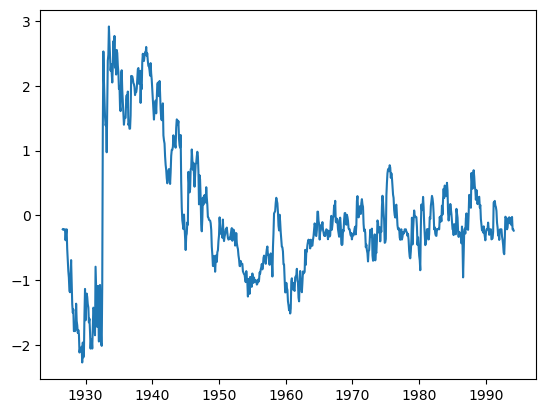

In [385]:
plt.plot(df_sorted.iloc[:, -18])

In [389]:
import pandas as pd
from sklearn.decomposition import PCA

# Assuming you have a DataFrame called 'df_sorted' with standardized features

# Create the PCA object
pca = PCA(n_components=20)

# Fit PCA on the standardized data
pca.fit(df_sorted)

# Transform the data using PCA
df_pca = pca.transform(df_sorted)

# Convert the transformed data back to a DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC{}'.format(i) for i in range(1, pca.n_components_ + 1)], index=df_sorted.index)

# Get the feature loadings for each principal component
feature_loadings = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i) for i in range(1, pca.n_components_ + 1)], index=df_sorted.columns)

# Print the df_pca and feature loadings
display(df_pca)
display(feature_loadings_percentage)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Date,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.291917,-2.991854,24.476743,0.985860,-1.176190,2.148264,0.927575,0.980187,0.714064,0.154651,0.315635,-0.129181,-0.099435,-0.485093,0.539668,0.464148,-0.291519,0.711947,-0.208891,0.008010
1926-08-31,-0.361158,-1.929211,14.004873,0.670535,0.069681,-0.417386,-0.845876,-0.073990,-0.259002,0.093323,0.269221,-0.382040,0.536639,-0.580357,0.152453,-0.011868,-0.194327,-0.295862,0.283255,0.552852
1926-09-30,-0.144902,-2.342244,18.636638,0.906522,-0.403197,0.706943,-0.153582,0.307622,0.046300,0.284252,-0.068885,0.095561,-0.085402,-0.039064,0.175593,0.156373,-0.234274,-0.200559,0.140730,0.233673
1926-10-31,0.067780,-2.044672,15.689457,0.225511,0.229370,0.266361,0.082798,-0.036899,0.360720,0.078754,0.047891,0.248046,0.002338,-0.135450,-0.206296,-0.548022,0.033751,-0.484980,0.360985,0.515186
1926-11-30,0.051734,-3.200136,27.458472,1.372703,-0.242216,1.509218,0.095461,0.694652,0.250824,0.183079,0.059979,0.277070,-0.303213,0.172772,0.074174,0.121698,-0.055056,-0.015161,0.138778,-0.098971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993-10-31,0.936827,-1.722899,-0.221836,-0.067254,-3.229540,-0.494870,-0.126509,-1.282180,-1.436391,-1.345915,-0.081192,1.734630,1.307864,0.534186,-0.151580,0.283844,1.287454,-0.900713,0.507546,0.065340
1993-11-30,1.091200,-1.430520,-0.246300,-0.166959,-3.864010,-0.008009,0.285592,-0.958873,-0.677377,-1.638837,-0.244989,1.972730,0.481920,0.099784,-0.271051,0.453660,1.209032,0.610988,-0.066734,-0.068007
1993-12-31,0.343098,-1.320035,-0.146307,0.015847,-3.625962,-1.071040,-0.978679,-1.171168,-1.306307,-1.376980,-0.249922,1.924209,1.568396,0.485272,-0.073268,0.770850,1.313609,-0.590694,0.426959,0.045551


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Value Returns,2.554122,0.454774,0.562082,-3.382767,-3.602481,5.984595,8.112131,0.019207,4.175550,2.026050,-0.719191,1.814519,2.414864,4.439655,-0.817512,2.092922,-0.071891,-16.195138,6.691309,-0.499221
Momentum Returns,-2.401752,0.653027,0.886234,2.155014,2.753310,-6.239645,-9.509024,-2.244312,-3.798685,1.325716,0.003257,-1.075565,5.069335,3.096033,-1.326667,2.164685,-0.167095,-14.747106,6.464264,0.267656
Value-Momentum Spread,2.865241,-0.149678,-0.233305,-3.168389,-3.654028,7.087306,10.248695,1.380875,4.606163,0.300086,-0.395850,1.650444,-1.772802,0.540946,0.362344,-0.175558,0.062656,0.135261,-0.282558,-0.436824
Value 12M Returns,5.593146,1.193486,0.471070,-3.110701,-2.447154,-0.020317,-1.987704,-4.010895,-3.608621,2.646042,0.162968,0.898859,4.055286,3.851782,-0.293971,1.383437,3.063853,3.162743,-1.136660,-2.273682
Momentum 12M Returns,-5.355918,2.376406,0.398220,-1.053384,0.605487,0.588194,-1.420917,-2.374316,5.661737,4.073798,-0.563817,0.057765,5.410151,4.348428,-2.183289,3.229959,3.828858,3.690839,-1.960833,0.076493
Value-Momentum 12M Spread,6.380750,-0.553861,0.075157,-1.354189,-1.845892,-0.332722,-0.458304,-1.193049,-5.317510,-0.577630,0.407846,0.525527,-0.431736,0.020021,1.006128,-0.900717,-0.185426,-0.049032,0.362891,-1.450491
Value 36M Returns,4.367752,1.348876,0.332158,1.613364,-3.361808,-5.601363,-2.182002,-2.754720,6.408632,0.134643,3.488293,3.134417,1.458161,2.146427,2.643650,-0.939520,-0.293363,-0.697928,-4.703635,-3.954304
Momentum 36M Returns,-4.275444,3.413487,0.720412,-4.260574,-1.143417,2.338419,1.193938,-1.387302,-4.771991,3.720851,0.343306,2.860193,3.986662,0.254299,3.796589,-3.788726,3.449627,5.878122,5.749960,0.404750
Value-Momentum 36M Spread,5.053487,-1.017483,-0.185114,3.326943,-1.474689,-4.768196,-2.011575,-0.963107,6.597207,-1.942431,1.989354,0.397838,-1.261460,1.200647,-0.418325,1.477239,-2.061748,-3.636751,-6.066087,-2.687500
Rolling Value Mean,5.566828,1.229165,0.485574,-3.108779,-2.458608,-0.077478,-1.949101,-4.108742,-3.576636,2.696825,-0.071334,0.898185,3.946397,4.016153,-0.389930,1.293220,3.051629,3.414671,-1.106686,-2.014653


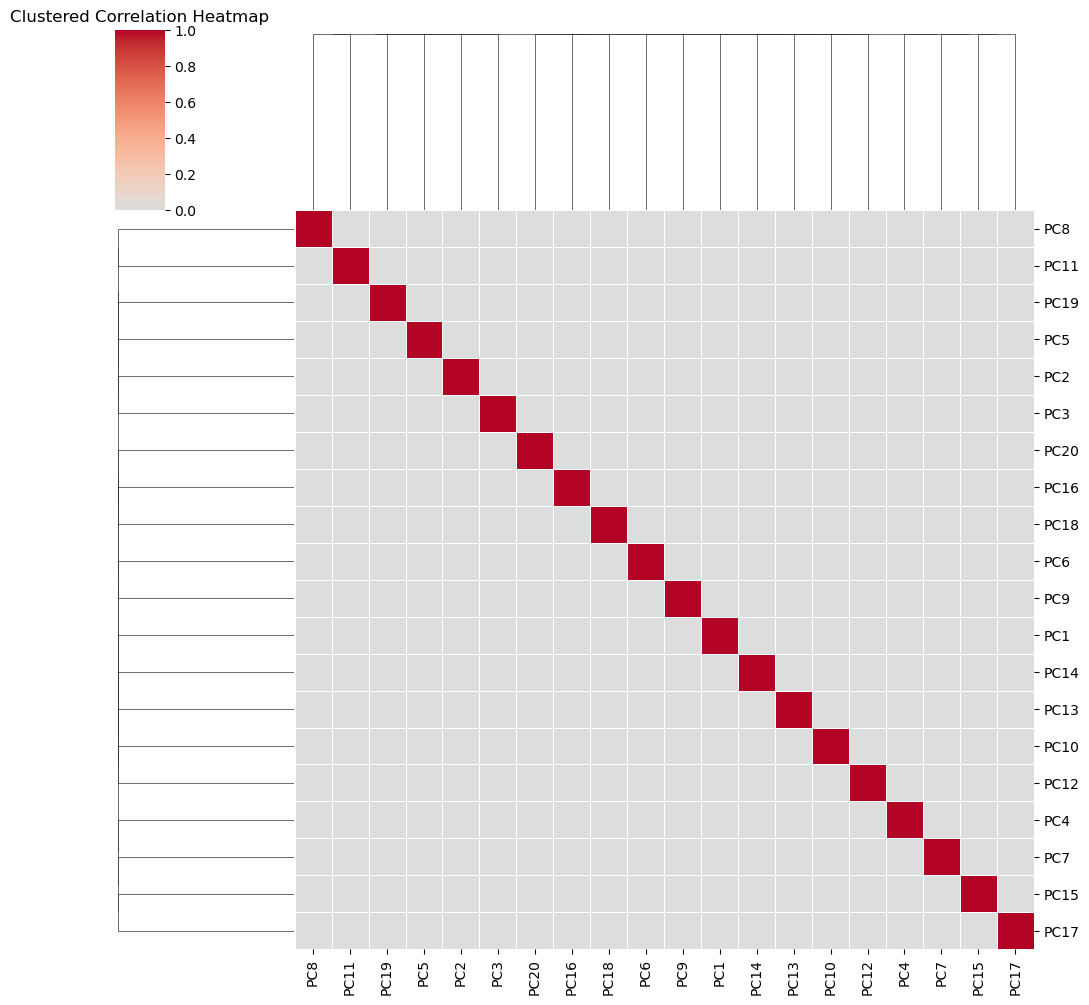

In [390]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.clustermap(df_pca.corr(), cmap='coolwarm', center=0, annot=False, fmt='.2f', linewidths=.5)

plt.title('Clustered Correlation Heatmap')
plt.show()

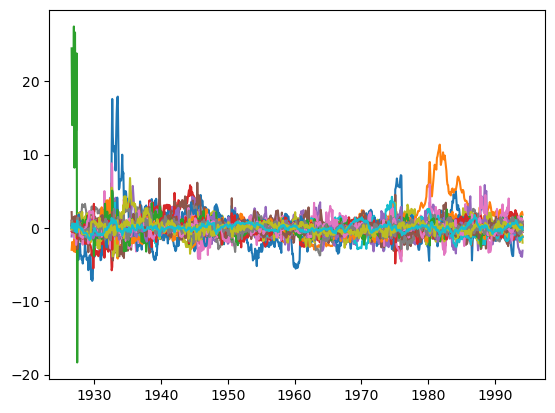

In [391]:
plt.plot(df_pca)

In [387]:
# assuming df is your DataFrame
df_pca.to_excel('PCA Training Data.xlsx')

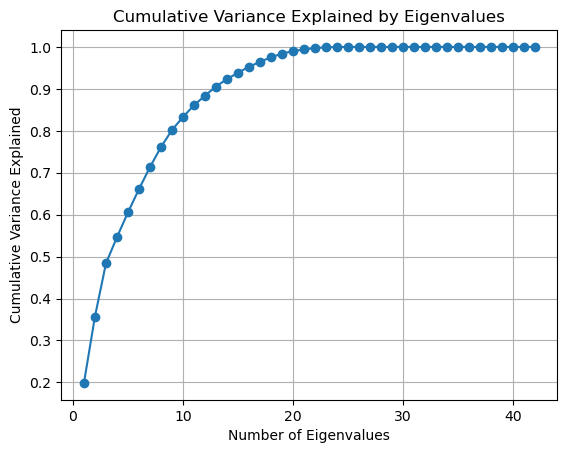

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have a DataFrame called 'df_sorted' with standardized features

# Create the PCA object
pca = PCA()

# Fit PCA on the standardized data
pca.fit(df_sorted)

# Get the eigenvalues
eigenvalues = pca.explained_variance_

# Compute the cumulative sum of eigenvalues and normalize
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# Plot the cumulative variance explained
plt.plot(range(1, len(eigenvalues) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Eigenvalues')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Eigenvalues')
plt.grid(True)
plt.show()

In [261]:
# assuming df is your DataFrame
df_train.to_excel('Training Data.xlsx')

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
corr = df_monthly_imputed.corr()

display(corr)

,Value Returns,Momentum Returns,Value-Momentum Spread,Value 12M Returns,Momentum 12M Returns,Value-Momentum 12M Spread,Value 36M Returns,Momentum 36M Returns,Value-Momentum 36M Spread,Rolling Value Mean,Rolling Momentum Mean,Rolling Mean Difference,Value Volatility,Momentum Volatility,Volatility Difference,Value Skewness,Momentum Skewness,Skewness Difference,Value Excess Curtosis,Momentum Excess Kurtosis,Kurtosis Difference,Correlation,Value Drawdown,Momentum Drawdown,Drawdown Difference,Regime,Effective Federal Funds Rate,Federal Reserve Assets,30Y Mortage Rates,15Y Mortage Rates,5/1Y Mortage Rates,3M Treasury Yields,2Y Treasury Yields,5Y Treasury Yields,10Y Treasury Yields,10-2Y Yield Spreads,10-3M Yield Spreads,Chicago Fed National Financial Stress,St. Louis Fed Financial Stress,Sentiment,CAPE,Beta,Geopolitical Risk
Value Returns,1.000000,-0.519550,0.849306,0.324940,-0.144897,0.276722,0.163934,-0.068348,0.143456,0.323331,-0.143516,0.275130,0.150567,0.160527,-0.043172,0.095542,-0.032961,0.082529,0.058362,-0.013503,0.057287,-0.020570,0.222778,-0.084258,0.179766,-0.550996,0.050188,0.016301,0.068942,0.064256,0.085354,0.004573,-0.025519,0.063620,0.070756,0.026844,0.033302,0.059459,0.027958,-0.022368,-0.092251,0.134669,-0.010908
Momentum Returns,-0.519550,1.000000,-0.892317,-0.144732,0.275741,-0.241505,-0.059681,0.160431,-0.129813,-0.144972,0.274346,-0.241093,-0.153307,-0.163295,0.043681,-0.046252,0.045576,-0.057945,-0.043310,-0.009455,-0.029091,0.025420,-0.088716,0.187425,-0.203888,0.621812,0.056046,-0.027215,0.044040,0.034426,0.048328,-0.013102,-0.043825,0.057700,0.049741,0.044762,0.041834,0.007885,0.045843,0.008881,0.015515,-0.149417,-0.022231
Value-Momentum Spread,0.849306,-0.892317,1.000000,0.261089,-0.246913,0.295405,0.123481,-0.135229,0.155992,0.260388,-0.245321,0.294309,0.174264,0.185698,-0.049795,0.079052,-0.045572,0.079402,0.057592,-0.001292,0.048239,-0.026573,0.172508,-0.160312,0.220941,-0.675273,-0.008112,0.025426,0.009214,0.012677,0.015234,0.010511,0.013594,-0.002038,0.006650,-0.013473,-0.008253,0.026541,-0.013552,-0.017304,-0.058323,0.163462,0.007972
Value 12M Returns,0.324940,-0.144732,0.261089,1.000000,-0.480958,0.871227,0.519440,-0.186338,0.437250,0.999022,-0.483903,0.872781,0.367261,0.340740,-0.013646,0.261933,-0.143424,0.258489,0.230824,0.019267,0.175625,0.080756,0.536254,-0.199519,0.429883,-0.148911,0.149735,0.002222,0.192761,0.185231,0.182958,0.084359,0.003779,0.208307,0.232226,0.000551,0.030995,0.062732,0.001744,-0.094122,-0.238437,0.119301,-0.033303
Momentum 12M Returns,-0.144897,0.275741,-0.246913,-0.480958,1.000000,-0.849399,-0.209145,0.548936,-0.447317,-0.476656,0.998898,-0.847004,-0.387298,-0.433726,0.148578,-0.123212,0.187749,-0.194659,-0.164719,-0.088389,-0.072295,0.021797,-0.196343,0.480979,-0.508136,0.174741,0.189170,-0.069972,0.176813,0.170200,0.147575,0.086589,0.003383,0.171515,0.141950,-0.000737,-0.020599,0.148907,0.004465,0.034740,0.020699,-0.146922,-0.052550
Value-Momentum 12M Spread,0.276722,-0.241505,0.295405,0.871227,-0.849399,1.000000,0.429772,-0.419509,0.513648,0.868230,-0.850555,0.999594,0.437914,0.447945,-0.091402,0.226654,-0.191452,0.264584,0.231167,0.061086,0.146194,0.036407,0.432725,-0.389395,0.543265,-0.187472,-0.015782,0.040514,0.017035,0.016206,0.027505,0.002299,0.000381,0.029360,0.060310,0.000744,0.030191,-0.045610,-0.001450,-0.076107,-0.155115,0.154072,0.009376
Value 36M Returns,0.163934,-0.059681,0.123481,0.519440,-0.209145,0.429772,1.000000,-0.366888,0.846442,0.518578,-0.212023,0.431091,0.210987,0.162180,0.052712,-0.025810,-0.135382,0.065352,0.081061,-0.029585,0.087505,0.176415,0.513655,-0.236846,0.451090,-0.053084,0.305373,-0.074775,0.289308,0.284193,0.262214,0.156916,0.006734,0.333331,0.370333,0.000170,0.024151,-0.114899,-0.000649,-0.240043,-0.369709,0.107366,-0.138074
Momentum 36M Returns,-0.068348,0.160431,-0.135229,-0.186338,0.548936,-0.419509,-0.366888,1.000000,-0.805898,-0.185308,0.547181,-0.418341,-0.298612,-0.286942,0.028939,-0.045204,0.144605,-0.117415,-0.119459,-0.08

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.clustermap(df_pca.corr(), cmap='coolwarm', center=0, annot=False, fmt='.2f', linewidths=.5)

plt.title('Clustered Correlation Heatmap')
plt.show()

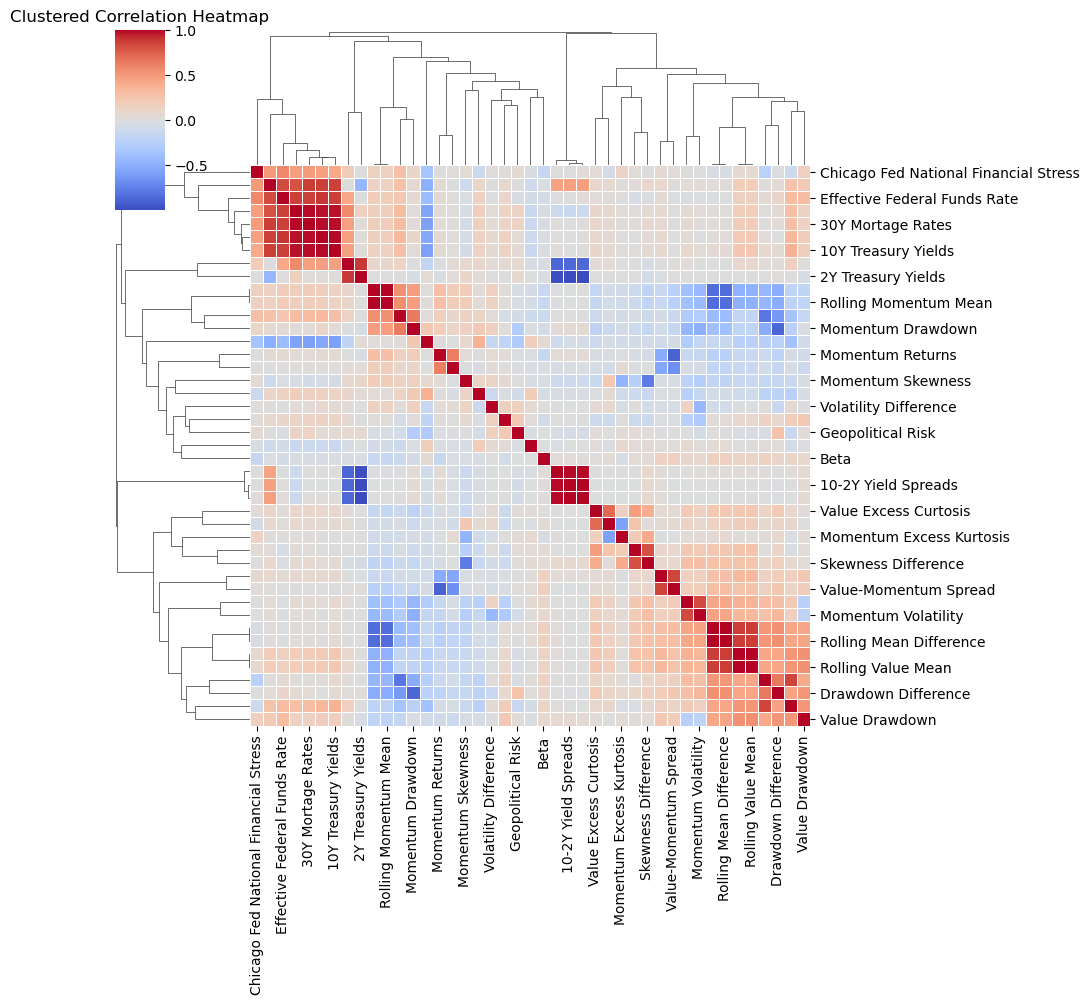

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.clustermap(df_monthly_imputed.corr(), cmap='coolwarm', center=0, annot=False, fmt='.2f', linewidths=.5)

plt.title('Clustered Correlation Heatmap')
plt.show()

## Random Forests

### Data

In [ ]:
# Load your data (replace 'your_data.csv' with your actual file)
data = pd.read_csv('return based data.csv')

# Assuming the columns in the dataset are named 'feature_1', 'feature_2', 'momentum_returns', 'value_returns'
# Create a new column 'target' to store the label (1 for momentum, 0 for value)
data['target'] = np.where(data['momentum_returns'] > data['value_returns'], 1, 0)

# Select the feature variables and target variable
X = data[['feature_1', 'feature_2']]
y = data['target']

# Align the features space in a direction that aligns with the axes to speed up the computation and reduce overfitting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a scatter plot of the original feature space
plt.figure(figsize=(20, 6))


plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Feature Space')
plt.colorbar().set_label('Target (1=Momentum, 0=Value)')

# Create a scatter plot of the transformed data (PCA)
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Transformation')
plt.colorbar().set_label('Target (1=Momentum, 0=Value)')

plt.show()

### Model

In [ ]:
# Create a Random Forest classifier and fit it on the training data
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict the labels and probabilities for the testing set
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Choose a tree from the random forest (e.g., the first tree)
tree_to_visualize = clf.estimators_[0]

# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_visualize, feature_names=['PCA1', 'PCA2'], class_names=['Value', 'Momentum'], filled=True, fontsize=10)
plt.show()

### Classfifcation Evaluation

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute ROC curve and ROC AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Compute classification metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
true_positive_rate = recall
false_positive_rate = fpr[1]
specificity = 1 - false_positive_rate
true_negative_rate = specificity
f1 = f1_score(y_test, y_pred)
prevalence = np.sum(y_test) / len(y_test)

# Print classification metrics
print("Classification Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"True Positive Rate (Recall): {true_positive_rate:.2f}")
print(f"True Negative Rate (Specificity): {true_negative_rate:.2f}")
print(f"False Positive Rate: {false_positive_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Prevalence: {prevalence:.2f}")

# Plot confusion matrix
plt.figure(figsize=(6, 6))
plt.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i, s=cm[i, j], va='center', ha='center', fontsize=16)
plt.xticks([0, 1], ['Value', 'Momentum'])
plt.yticks([0, 1], ['Value', 'Momentum'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Performance

In [ ]:
# Calculate the new time series
binary_bet_returns = []
prob_weighted_returns = []

for i, (value_prob, momentum_prob) in enumerate(y_pred_proba):
    # Binary bet
    if momentum_prob > value_prob:
        binary_bet_returns.append(data.loc[X_test.index[i], 'momentum_returns'])
    else:
        binary_bet_returns.append(data.loc[X_test.index[i], 'value_returns'])

    # Probability weighted bet
    prob_weighted_returns.append(value_prob * data.loc[X_test.index[i], 'value_returns'] + momentum_prob * data.loc[X_test.index[i], 'momentum_returns'])

# Calculate cumulative returns for each time series
cumulative_momentum_returns = np.cumprod(1 + data.loc[X_test.index, 'momentum_returns']) - 1
cumulative_value_returns = np.cumprod(1 + data.loc[X_test.index, 'value_returns']) - 1
cumulative_binary_bet_returns = np.cumprod(1 + np.array(binary_bet_returns)) - 1
cumulative_prob_weighted_returns = np.cumprod(1 + np.array(prob_weighted_returns)) - 1

# Plot the cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_momentum_returns, label='Momentum')
plt.plot(cumulative_value_returns, label='Value')
plt.plot(cumulative_binary_bet_returns, label='Binary Bet')
plt.plot(cumulative_prob_weighted_returns, label='Probability Weighted Bet')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.title('Comparison of Strategy Performance')
plt.legend()
plt.show()

### Performance Evaluation

In [ ]:
def calculate_performance_metrics(returns):
    # Calculate mean return
    mean_return = np.mean(returns)
    
    # Calculate standard deviation
    std_dev = np.std(returns)
    
    # Calculate Sharpe Ratio (assuming a risk-free rate of 0)
    sharpe_ratio = mean_return / std_dev
    
    # Calculate Maximum Drawdown
    cum_returns = np.cumprod(1 + returns) - 1
    peak = np.argmax(np.maximum.accumulate(cum_returns) - cum_returns)
    trough = np.argmax(cum_returns[:peak])
    max_drawdown = cum_returns[trough] - cum_returns[peak]
    
    return mean_return, std_dev, sharpe_ratio, max_drawdown

# Calculate performance metrics for each time series
momentum_metrics = calculate_performance_metrics(data.loc[X_test.index, 'momentum_returns'])
value_metrics = calculate_performance_metrics(data.loc[X_test.index, 'value_returns'])
binary_bet_metrics = calculate_performance_metrics(binary_bet_returns)
prob_weighted_metrics = calculate_performance_metrics(prob_weighted_returns)

# Print performance metrics
print("Momentum Performance Metrics:")
print(f"Mean Return: {momentum_metrics[0]:.4f} | Standard Deviation: {momentum_metrics[1]:.4f} | Sharpe Ratio: {momentum_metrics[2]:.4f} | Max Drawdown: {momentum_metrics[3]:.4f}")
print("Value Performance Metrics:")
print(f"Mean Return: {value_metrics[0]:.4f} | Standard Deviation: {value_metrics[1]:.4f} | Sharpe Ratio: {value_metrics[2]:.4f} | Max Drawdown: {value_metrics[3]:.4f}")
print("Binary Bet Performance Metrics:")
print(f"Mean Return: {binary_bet_metrics[0]:.4f} | Standard Deviation: {binary_bet_metrics[1]:.4f} | Sharpe Ratio: {binary_bet_metrics[2]:.4f} | Max Drawdown: {binary_bet_metrics[3]:.4f}")
print("Probability Weighted Bet Performance Metrics:")
print(f"Mean Return: {prob_weighted_metrics[0]:.4f} | Standard Deviation: {prob_weighted_metrics[1]:.4f} | Sharpe Ratio: {prob_weighted_metrics[2]:.4f} | Max Drawdown: {prob_weighted_metrics[3]:.4f}")